In [1]:
!pip install qiskit

In [2]:
!pip install qiskit_aer

In [3]:
!pip install pylatexenc

Implement quantum gates  using superdense coding

Use  an additional qubit as a random bit generator to randomly choose c and d, then run the superdense coding protocol to see that these bits are transmitted correctly.

Running the  simulator shows that Alice and Bob's classical bits always agree.

In [19]:
#lab 6
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

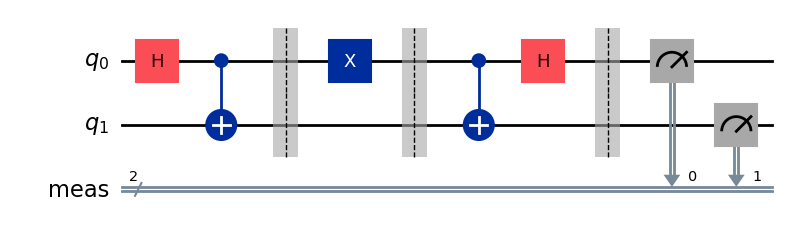

In [5]:
c = "1"
d = "0"
protocol = QuantumCircuit(2)

#prepare ebit for superdense coding
protocol.h(0)
protocol.cx(0,1)
protocol.barrier()

#Alice operations
if d== "1":
  protocol.z(0)
if c == "1":
  protocol.x(0)
protocol.barrier()

#bob's actions
protocol.cx(0,1)
protocol.h(0)
protocol.measure_all() #measures all qbits and puts the results into a single classical register

display(protocol.draw(output="mpl"))

Use an additional qubit as a random bit generator to randomly choose c and d, then run the superdense coding protocol to see that these bits are transmitted correctly.

measure 10 with frequency 1.0


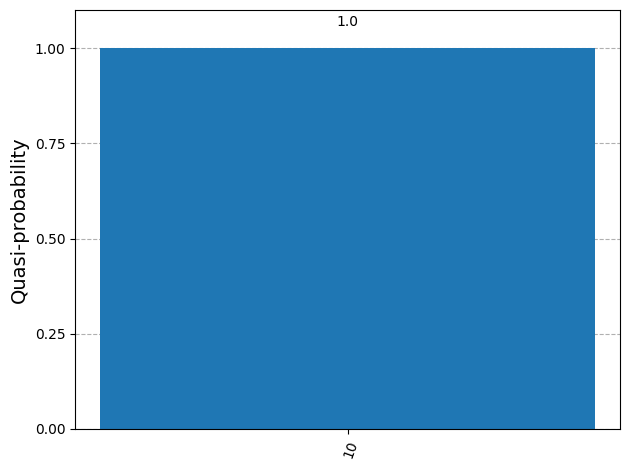

In [8]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
  print(f"measure {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

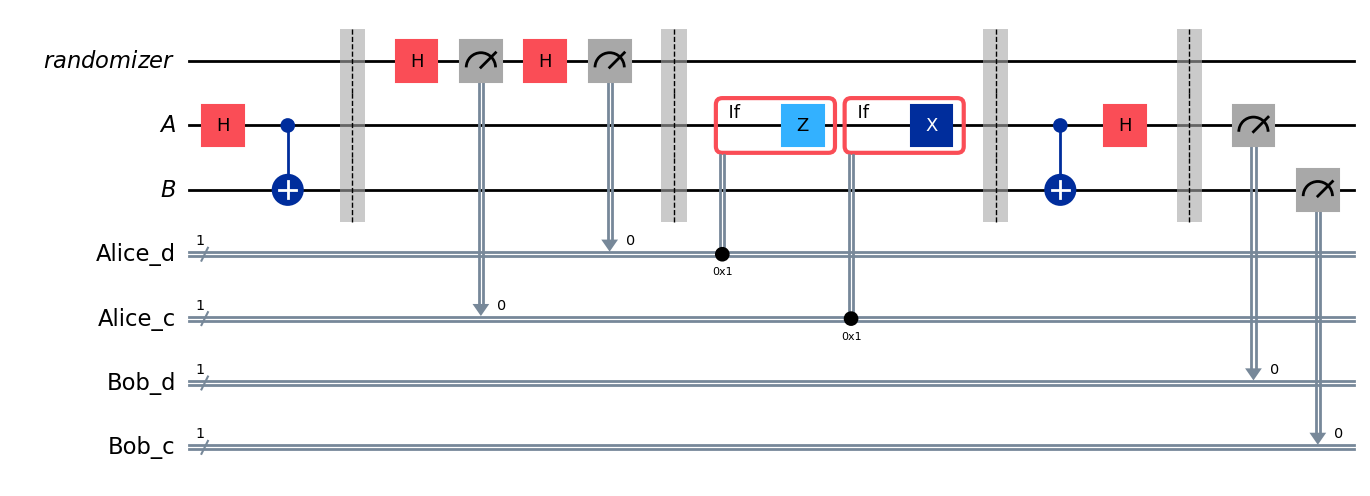

In [17]:
rgb = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice_c")
Alice_d = ClassicalRegister(1, "Alice_d")

test = QuantumCircuit(rgb, ebit0, ebit1, Alice_d, Alice_c)

test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

test.h(rgb)
test.measure(rgb, Alice_c)
test.h(rgb)
test.measure(rgb, Alice_d)
test.barrier()

#protocol starting with Alice's actions, which depends on her bits.
with test.if_test((Alice_d, 1), label = "Z"):
  test.z(ebit0)
with test.if_test((Alice_c, 1),label = "X"):
  test.x(ebit0)
test.barrier()

#bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob_c")
Bob_d = ClassicalRegister(1, "Bob_d")

test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw(output='mpl'))


Running the  simulator shows that Alice and Bob's classical bits always agree.

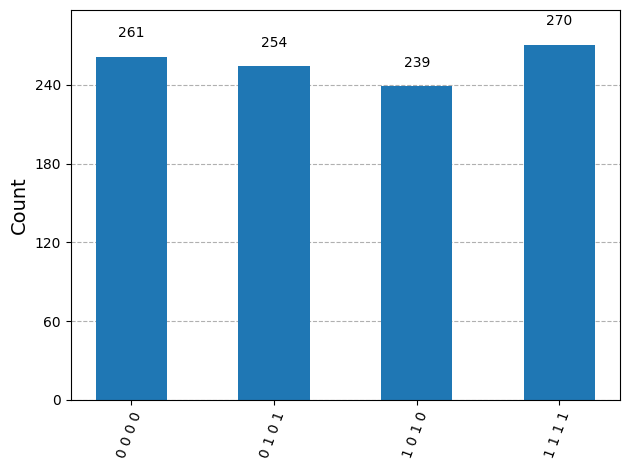

In [20]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))